# 159. SOPORTE VECTORIAL CLASIFICADOR LINEAL 

## LINEAR SUPPORT VECTOR CLASSIFIER

La tecnica mas sencilla y mas aplicable es la maquina de soporte vectorial lineal. La clasificacion o la segmentacion a traves de estas maquinas, se lleva acabo con una gran cantidad de opciones, tal como el suport vector classifier. LVC es el masa sencillo. 

Objetivo de un linear suport vector classifier es clasificar los datos que se le proporcionen devolviendo el mejor hiperplano que sea
capaz de dividirlos. Cuando se tengan pocos datos o se puedan separar de forma lineal. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style 
style.use ("ggplot")
from sklearn import svm

In [2]:
#Ejemplo en 2 dimensiones 
x = [1,5,1.5,8,1,9]
y = [2,8,1.8,8,0.6,11]

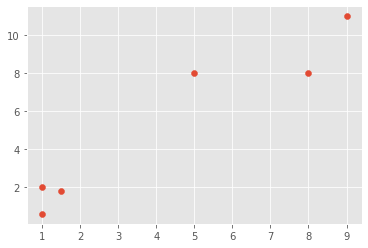

In [3]:
plt.scatter(x,y)
plt.show()
#recta que separara este conjunto de datos en 2. 
#suministrarle al algoritmo de machine learning el array de funcionalidades que acabamos de generar. 

# 160. CREANDO EL MODELO CLASIFICADOR LINEAL 

In [6]:
data = np.array(list(zip(x,y)))
data #array de datos, para llevar acabo el soporte vectorial clasificador lineal. 

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [9]:
#vamos a necesitar etiquetar cada una de los puntos si pertenece al grupo de abajo o de arriba, esto porque es un algoritmo supervisado. 
target = [0, 1, 0, 1, 0, 1] #las 6 clasificaciones 0 o 1, las 2 etiquetas que se van a usar. 

In [7]:
#creamos el clasificador 
classifier = svm.SVC(kernel = "linear", #vamos a buscar una recta
                    C = 1.0) #forma de evaluar como de mal queremos que sea la clasificacion. 
#tecnica que vamos a usar

In [10]:
classifier.fit(data,target)
#ahora ya sabemos que el modelo ha aprendido de nuestros datos, 
#apartir de ahora podemos predecir como probar si un punto cualquiera de adentro cae en la zona de 0 o en la zona de 1. 

SVC(kernel='linear')

In [12]:
#tomemos un punto 
classifier.predict(np.array([0.57, 0.67]).reshape(1,2)) #con el reshape lo que hacemos es convertirlo en un elemento de 
#una fila y 2 columnas. 
#el predictor predice que caeria en la categoria 0. 

array([0])

# 161. REPRESENTACION GRAFICA DEL HIPERPLANO SEPARADOR EN 2D

Representacion grafica usando ggplot. Empezaremos por saca del clasificador los pesos que ha elaborado. 

In [14]:
w = classifier.coef_[0] #sacamos solo el primer elemento 
w #tenemos los pesos para la primera y la segunda categoria. 

array([0.1380943 , 0.24462418])

In [15]:
#ahora hay que establecer el valor del clasificador del siguiente modo. 
a = -w[0] / w[1]
a #pendiente de la recta. 

-0.564516129032258

In [17]:
#calculamos la ordenada en el origen de la recta 
b = - classifier.intercept_[0] / w[1]
b

6.734677437813051

ECUACION DEL HIPERPLANO EN 2D \
con la a y b, podemos ahora establecer el hiperplano que hemos obtenido sera 
* y = a* x + b 

In [18]:
#Para hacer la recta generamos un vector 
xx = np.linspace(0,10)
yy = a * xx + b 

[]

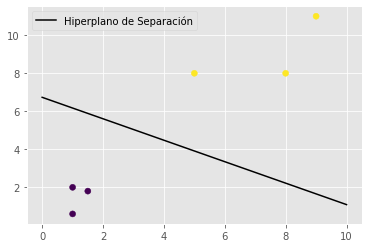

In [21]:
plt.plot(xx, yy, 'k-', label = "Hiperplano de Separación")
plt.scatter(x,y, c = target)
plt.legend()
plt.plot()

# 162. EL PROBLEMA DE SEPARACION 

Ahora veremos su potencial total, herramienta muy potente de los algoritmos supervisados tanto para clasificar como para regresion. Veremos como utilizarlo en un problema de clasificacion que se ira complicando a medida que vayamos avanzando. 

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns; sns.set() #otra forma de hacer representaciones graficas. 

In [24]:
from sklearn.datasets.samples_generator import make_blobs

In [25]:
X, Y = make_blobs(n_samples = 50, #generar 50 puntos 
                  centers = 2, #centrados en dos lugares diferentes 
                  random_state = 0, #para cuestiones reproductividad 
                  cluster_std = 0.6) # desviacion estandar de cada cluster. 
#esto ha generado dos distribuciones de puntos. 

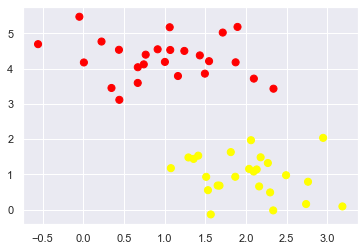

In [26]:
plt.scatter(X[:, 0], X[:,1], c = Y,  #el color la establecera la "Y", pues es la clasificacion. 
            s = 50, 
            cmap = "autumn")
#tenemos dos distribuciones que proceden de dos generadores diferentes. 

(-1.0, 3.5)

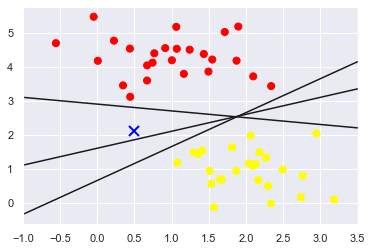

In [31]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:,1], c = Y,   s = 50, cmap = "autumn")
#incorporamos un punto adicional que sea dificil de clasificar 
plt.plot([0.5], [2.1], 'x', color = "blue", markeredgewidth = 2, markersize = 10)

#¿Como lo clasificamos?
#estableceremos un conjunto de rectas de separacion y que van a permitir poner en duda la clasificacion de ese punto. 
for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]: #estos son valores a y b. 
    yy = a * xx + b
    plt.plot(xx, yy, "-k" )
    
plt.xlim(-1,3.5) #apartir de estas rectas donde clasificamos este punto. 
#si cualquiera de esas rectas fuera el clasificador, el punto seria o de arriba o de abajo. 
#todas esas rectas podrian ser separadores. 
#¿Cual hay que elegir?

# 163. MAXIMIZAR EL MARGEN DE CLASIFICACION 

¿Cual de las rectas que hemos pintado es buena? 
¿Cual es el hiperplano que mejor separa los conjuntos de datos es un problema que lo soluciona el suport vector machine. 
la intuicion es la siguiente, en lugar de pintar una recta que es una entidad que tiene dimension 0, entre las clases a separar,
porque no pintamos un pasillo con un margen sufuciente e intenamos pintar el mas ancho posible, hasta encontrarnos con el primer punto. 
maximizar el margen. 

(-1.0, 3.5)

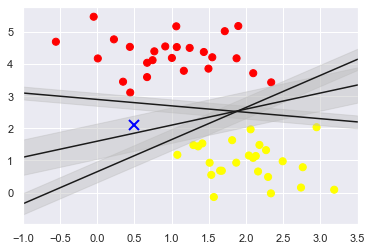

In [35]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:,1], c = Y,   s = 50, cmap = "autumn")

plt.plot([0.5], [2.1], 'x', color = "blue", markeredgewidth = 2, markersize = 10)

 
for a, b, d in [(1,0.65,0.33), (0.5, 1.6, 0.55), (-0.2, 2.9,0.2)]: 
    yy = a * xx + b
    plt.plot(xx, yy, "-k" )
    plt.fill_between(xx, yy-d, yy+d, edgecolor = 'none', color = "#BBBBBB", alpha = 0.4) #siendo d el corredor hasta encontrarnos con el siguiente punto, las d 
    #yas las tenemos calculadas 0.33, 0.55, 0.2
plt.xlim(-1,3.5)

#la que esta entre las dos es un pasillo muy ancho
#en suport vector machine la linea que maximiza el margen es una de las tecnicas 
#que se utiliza para elegir el modelo optimo entre los que hay disponibles. 
#esta tecnica entran dentro de los estimadores que maximizan los margenes, la tasa de error. 

# 164. LOS SOPORTES DE SVM 

In [ ]:
#utilizaremos un kenel lineal, que seria una recta. 


## CREACION DEL MODELO SVM 

In [36]:
from sklearn.svm import SVC

In [37]:
#ejemplo de clasificacion 
model = SVC(kernel = "linear", C = 1E10)
model.fit(X,Y)

SVC(C=10000000000.0, kernel='linear')

In [47]:
def plt_svc(model, ax = None, plot_support = True):
    """Plot de la funcion de decision para una clasificacion en 2d con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrilla para evaluar el modelo 
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representamos las fronteras y los margenes del SVC
    ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth = 1, facecolor = "none")
        
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

<ipython-input-47-0165d72f8069>:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])


[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


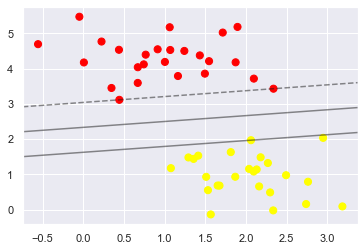

In [48]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model)
#Tenemos en medio el corredor y luego la linea discontinua para que establezca la anchura, 
#esa es la linea que maximiza el margen. 
#hay un par de puntos que rozan, que estan encima del margen. 
#esos puntos son los elementos pivotales para ese ajuste atraves de una recta, conocidos como vectores de soporte. 

#tenemos 3 vectores de soporte, son los puntos que estan sobre las lineas 
#de ello va a depender la ubicacion. 
#la clave para que el clasificador funcione es la posicion de los elementos sobre el margen. 
#los puntos mas alla del margen le da igual a la tecnica, lo importante es encontrar esos puntos con su posicion. 

In [55]:
#hacemos una variante donde solo se tomaran los primeros puntos del data set, entrenar en base a ellos. 
def plot_svm(N = 10, ax = None):
    X, Y = make_blobs(n_samples= 200, centers = 2, random_state = 0, cluster_std = 0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel = "linear", C = 1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

<ipython-input-47-0165d72f8069>:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])
<ipython-input-47-0165d72f8069>:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])


[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


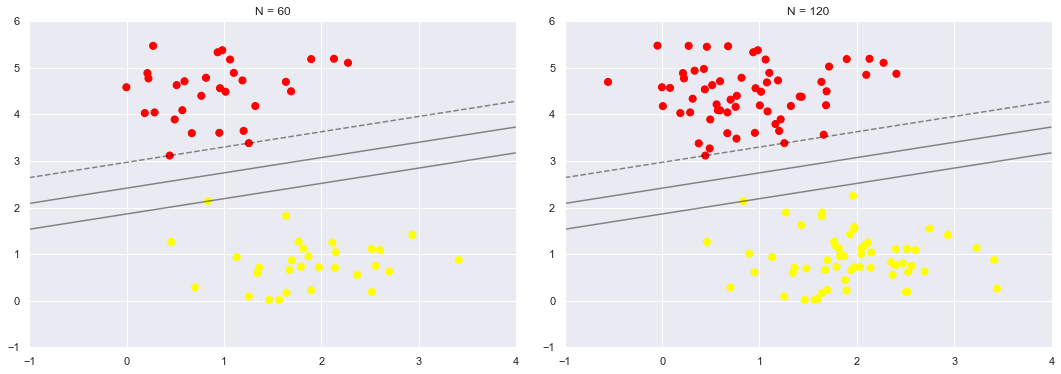

In [56]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for ax_i, N in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N = {0}". format(N))
    #De este ejemplo unicamente hemos usado el modelo para entrenar con 60 de los elementos de los 200. 
    #y luego solo con 120. 
    #en ningun caso no cambia el soporte. 

In [58]:
from ipywidgets import interact,fixed 

In [59]:
interact(plot_svm, N = [10, 200], ax = fixed(None))
#tanto para 10 como para 200 es lo mismo. 

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# 165. KERNELS NO LINEALES 

Identificar fronteras no lineales. 

In [60]:
from sklearn.datasets.samples_generator import make_circles 

In [61]:
X, Y = make_circles(100, factor = .1, noise = .1)

In [63]:
import matplotlib.pyplot as plt 
import numpy as np

In [110]:
#usamos la misma funcion anterior. 
def plt_svc(model, ax = None, plot_support = True):
    """Plot de la funcion de decision para una clasificacion en 2d con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrilla para evaluar el modelo 
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representamos las fronteras y los margenes del SVC
    ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])
    
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth = 1, facecolor = "Blue")
        
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [65]:
def plot_svm(N = 10, ax = None):
    X, Y = make_blobs(n_samples= 200, centers = 2, random_state = 0, cluster_std = 0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel = "linear", C = 1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

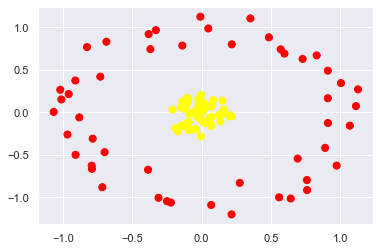

In [66]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")

<ipython-input-64-1b3cb461a577>:17: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])


[[ 0.35211233  1.10576914]
 [-0.68559415  0.83134419]
 [-0.78437334 -0.30926152]
 [-1.01020887  0.15231753]
 [-0.88104429 -0.05890448]
 [-0.22098257 -1.06166088]
 [ 0.21617579 -1.20092487]
 [-0.00848849  1.1256073 ]
 [ 0.90990133  0.16665818]
 [-0.71524186 -0.88064317]
 [ 0.27542996 -0.83001702]
 [ 0.64241489 -1.01352584]
 [ 1.00463547  0.34490506]
 [-0.13855216  0.78623226]
 [-0.3686266   0.74449368]
 [ 1.12764212  0.27097118]
 [-0.32925192  0.96779349]
 [ 0.55901456 -0.99994155]
 [ 1.06864448 -0.15631489]
 [ 0.97371163 -0.62680573]
 [-0.69861557 -0.46834274]
 [-0.72973941  0.42047289]
 [-0.90966031  0.37530596]
 [ 0.75894603 -0.7965463 ]
 [-0.31007792 -1.00536441]
 [-1.06559931  0.00540067]
 [-0.82532857  0.76826301]
 [-0.79163977 -0.62743405]
 [ 0.69272826 -0.54370974]
 [-0.90767979 -0.49996446]
 [ 0.21780315  0.80053263]
 [ 0.59762906  0.69178884]
 [-0.78975958 -0.66515944]
 [ 0.04866235  0.98718446]
 [ 0.72817942  0.6292877 ]
 [ 0.760446   -0.91471494]
 [-0.3811796   0.92128549]
 

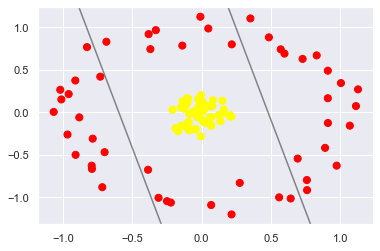

In [69]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(SVC(kernel = "linear").fit(X,Y), plot_support = False)
#Separarlo por una recta no es lo correcto, no sera la mejor forma de separarlo, 
#existen distintas tecnicas y talves una de ellas, podria ser aumentar la dimension del problema. 
#es decir pensar que los datos que estan en R2, son una proyeccion de datos que vienen de una dimension 
#superior de modo que ese separador lineal podria ser un hiperplano de dimension superior. 


In [87]:
# para ello elevamos la dimension y definimos un separador aleatorio 
r = np.exp(-(X**2).sum(1))


In [72]:
r #las alturas de cada uno de esos puntos. 

array([0.26009496, 0.99873954, 0.98749046, 0.99782324, 0.31311883,
       0.97504649, 0.49120966, 0.35214136, 0.45853953, 0.30852354,
       0.22560885, 0.2816574 , 0.9861357 , 0.42498756, 0.27606932,
       0.97438654, 0.4654317 , 0.97288231, 0.23694398, 0.32359844,
       0.97014691, 0.97500407, 0.52868745, 0.50149762, 0.26053915,
       0.3516809 , 0.95462375, 0.99186935, 0.26917855, 0.96538384,
       0.31147526, 0.95965839, 0.98884423, 0.26158401, 0.97495068,
       0.49291988, 0.96559155, 0.49198008, 0.99730075, 0.37971419,
       0.9590426 , 0.29805267, 0.33058022, 0.97705379, 0.99387333,
       0.32125147, 0.98103734, 0.99981864, 0.28044005, 0.9785356 ,
       0.99251261, 0.36046262, 0.46047684, 0.34169148, 0.92496657,
       0.95628911, 0.95532019, 0.50243415, 0.96009819, 0.43355688,
       0.94917587, 0.95895765, 0.92353942, 0.99268709, 0.99061037,
       0.97095046, 0.34432914, 0.98355243, 0.37647592, 0.39603675,
       0.99546367, 0.2429301 , 0.37006936, 0.97816616, 0.99493

In [74]:
from mpl_toolkits import mplot3d

In [89]:
def plot_3D(elev = 30, azim = 30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:,0], X[:,1],r, c = Y, s = 50, cmap = "autumn")
    ax.view_init(elev = elev, azim = azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_xlabel("r")
    
    

In [90]:
from ipywidgets import interact, fixed 

In [92]:
interact(plot_3D, elev = [-90,-60,-30,0,30,60,90],
         azim = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))
#podemos separar con un hiperplano, para la proyeccion. nos ha funcionado pues hemos elavado la dimension del problema. 

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.35211233,  1.10576914],
       [ 0.00609529,  0.03498725],
       [ 0.01483161, -0.11121362],
       [-0.04196896,  0.02043876],
       [-0.68559415,  0.83134419],
       [-0.02318628,  0.15726576],
       [-0.78437334, -0.30926152],
       [-1.01020887,  0.15231753],
       [-0.88104429, -0.05890448],
       [-0.22098257, -1.06166088],
       [ 0.21617579, -1.20092487],
       [-0.00848849,  1.1256073 ],
       [ 0.01043885,  0.11769595],
       [ 0.90990133,  0.16665818],
       [-0.71524186, -0.88064317],
       [-0.10208278, -0.12460458],
       [ 0.27542996, -0.83001702],
       [ 0.0818328 ,  0.14420664],
       [ 0.64241489, -1.01352584],
       [ 1.00463547,  0.34490506],
       [ 0.06966629, -0.15954427],
       [ 0.06622107, -0.14466654],
       [-0.13855216,  0.78623226],
       [-0.3686266 ,  0.74449368],
       [ 1.12764212,  0.27097118],
       [-0.32925192,  0.96779349],
       [-0.14673789, -0.15781631],
       [

pero hacer una eleccion asi sera un problema y no vamos a poder elevar la dimension del espacio vectorial y que funcione de 
forma tan trivial, sino que habra que buscar otro tipo de tecnica en la que poder basarnos y que funcione en la gran mayoria 
de los casos que nos toque analizar. 

# 166. RADIAL BASIS FUNCTION 

No siempre el problema se ha reducido. 
una estrategia para intentar solucionar el problema, es no buscar un kernel lineal, sino una transformacion del kernel basado en alguna relacion entre los pares de puntos que tenemos en el dataset original para intentar encontrar cual es la forma de separarlos que mas se ajusta a nuestras necesidades. El problema de esta estrategia es que basicamente proyectar n puntos en n dimension totalmente separadas, puede ser computacionalmente muy costoso. El elevar las dimensiones no siempre sera una salida. 


El truco del kernel se usa con el SVM

In [93]:
rbf = SVC(kernel = "rbf", C = 1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

[[-0.78437334 -0.30926152]
 [ 0.90990133  0.16665818]
 [ 0.27542996 -0.83001702]
 [-0.13855216  0.78623226]
 [-0.72973941  0.42047289]
 [ 0.69272826 -0.54370974]
 [ 0.21780315  0.80053263]
 [-0.38543264 -0.67529676]
 [-0.00371259  0.20446515]
 [-0.16998686 -0.22159004]
 [-0.00518442 -0.28198389]]


<ipython-input-98-4a89cb0b5437>:17: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])


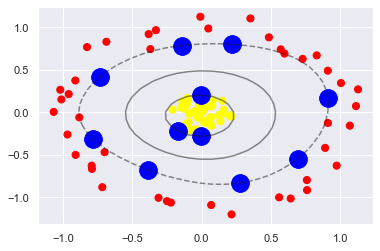

In [100]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn") #Esta linea nos pinta los puntos a separar
plt_svc(rbf) #La segunda incorporamos las lineas
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s = 300, lw = 1, facecolors = "blue") 

# 167. AJUSTANDO LAS SVM 

Podria ocurrirnos que tengamos datos que no esten tan claros donde una region de desicion perfecta no exista y que haya datos 
con overlaf, datos que estan mal clasificados por el propio soporte vectorial de un lado a otro. Haremos una tecnica para ajustar los parametros de SVM, en la cual basicamente no tendremos tan claro donde pertenece cada una de las opciones. 

In [101]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)

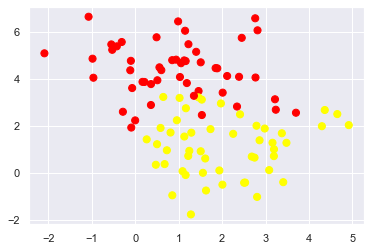

In [102]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
#sera imposible separar la informacion. 
#para estos casos la support vector machine tiene un factor que lo que hace es relajar las restricciones de margen 
#es decir permite que algunos puntos esten en el margen cambiado, lo cual permite un mejor ajuste a expensas de que un 
#punto quede mal clasificado, para hacer que el margen quede reducido se controla con el parametro C. 

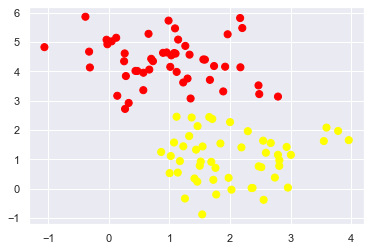

In [105]:
#usaremos una variante para ejemplicar. 
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")

<ipython-input-110-640288152d61>:17: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])
<ipython-input-110-640288152d61>:17: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P,colors = "k", levels =[-1,0,1], alpha = 0.5, linestyle = ["--", "-", "--"])


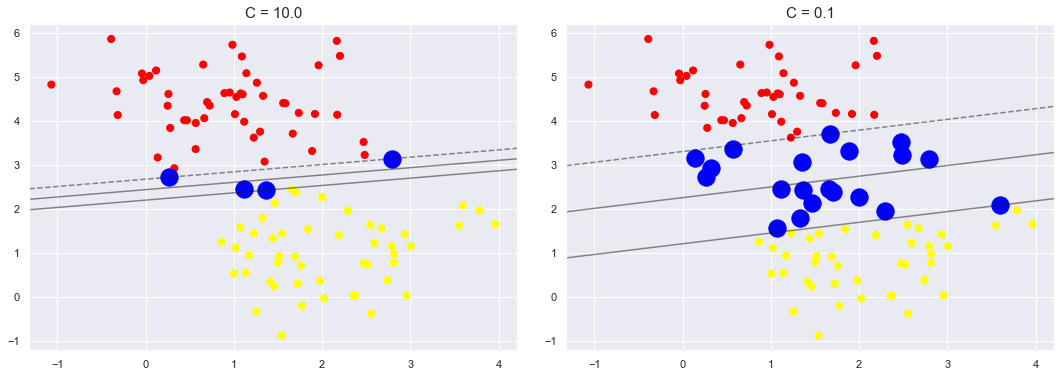

In [116]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
fig.subplots_adjust(left = 0.06, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax, [10, 0.1]):
    model = SVC(kernel = "linear", C= C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)


A la hora de establecer ese tipo de valores el ir jugando con las posibilidades hasta encontrar uno que valancee correctamente 
el numero de puntos que caen dentro y los puntos que al final quedan bien separados, sera un tarea dura, donde muchas veces tendremos 
que usar validacion cruzada, con diferentes subconjuntos de los datos orginales, distintos valores de c, para obtener un 
resultado que realmente nos guste. 

# 168. PRÁCTICA DE SVM: RECONOCIMIENTO FACIAL A LO CSI 

¿Como se usan las maquinas de soporte vectorial para clasificar? Ej. con reconocimiento facial, usaremos un dataset de caras que ya vienen como parte de scikit learn e intentaremos construir una forma de clasficar caras en base al supor vector machine. 

## RECONOCIMIENTO FACIAL 

In [6]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt 

In [3]:
faces = fetch_lfw_people(min_faces_per_person = 80)

In [4]:
print(faces.target_names) #personajes conocidos, de cada persona tengo las fotos y las etiquetas. 

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
print(faces.images.shape) #ha bajado 1140 fotos en total. 

(1140, 62, 47)


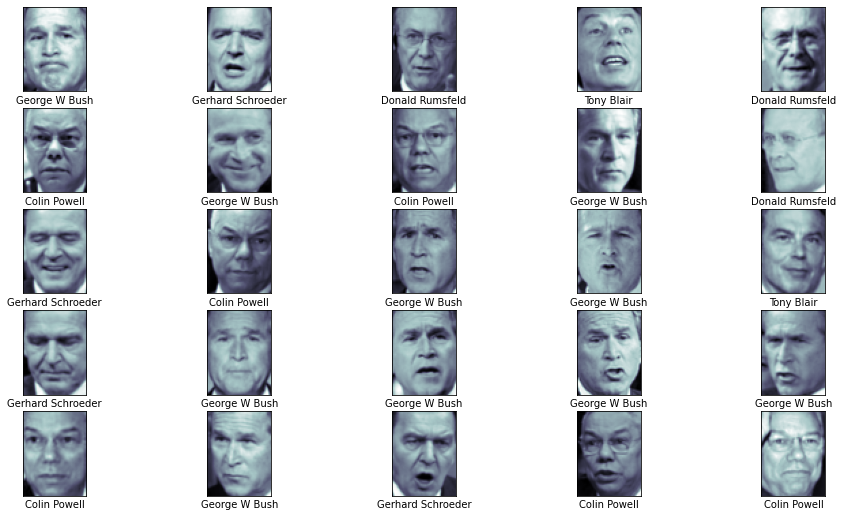

In [12]:
fig, ax = plt.subplots(5,5, figsize = (16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap = "bone")
    ax_i.set(xticks = [], yticks = [], xlabel = faces.target_names[faces.target[i]])
    #cada imagen consise de 62 pixeles de altura y 47 de anchura. cada foto tiene 2914 pixeles. 
    #usar cada pixel como clasificador no es lo mas convenviente en estos casos. 
    #usaremos una tecnica que es el analisis de componentes principales, 

In [14]:
from sklearn.svm import SVC 
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

In [16]:
#definimos 
pca = PCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = "rbf", class_weight = "balanced")
model = make_pipeline(pca, svc)
#apartir de aqui podemos elaborar una validacion cruzada o se puede elaborar una parte de entrenamiento 
#y otra para validar nuestros conjuntos de imagenes. 


In [18]:
from sklearn.model_selection import train_test_split 

In [20]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [23]:
#usamos una validacion cruzada, para explorar los parametros y las combinaciones posibles. 
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    "svc__C" : [0.1,1,5,10,50],
    "svc__gamma" : [0.0001, 0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

Wall time: 1min 15s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.1, 1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]})

In [25]:
print(grid.best_params_) #valores optimos 

{'svc__C': 5, 'svc__gamma': 0.005}


In [26]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imagenes (incorrectas en rojo)')

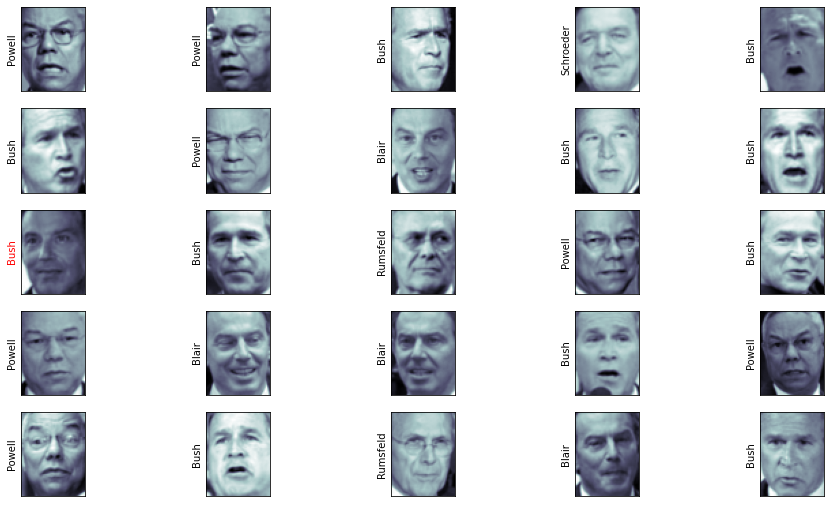

In [34]:
fi, ax = plt.subplots(5,5,figsize = (16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap ="bone")
    ax_i.set(xticks = [], yticks = [])
    ax_i.set_ylabel(faces.target_names[yfit[i]]. split()[-1], 
                   color = "black" if yfit[i] ==Ytest[i] else "red")
                    
fig.suptitle("Predicciones de las imagenes (incorrectas en rojo)", size = 15)
#vemos que la que tiene el nombre en rojo es porque lo ha clasificado mal. 

In [35]:
#para saber la eficiencia de nuestro estimador. 
from sklearn.metrics import classification_report 

In [37]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.94      0.93        64
  Donald Rumsfeld       0.96      0.81      0.88        32
    George W Bush       0.90      0.98      0.94       127
Gerhard Schroeder       0.89      0.83      0.86        29
       Tony Blair       0.96      0.82      0.89        33

         accuracy                           0.92       285
        macro avg       0.93      0.87      0.90       285
     weighted avg       0.92      0.92      0.91       285



In [43]:

from sklearn.metrics import confusion_matrix

# 169. PRACTICA SVM: CLASIFICACION DE LAS FLORES DE IRIS

Clasificar y obtener una regresion, una estimacion utilizando un dataset, el de iris, para clasificarlas por un lado y uno generado aleatoriamente para la regresion. 

### CLASIFICACION DE FLORES IRIS

In [44]:
import pandas as pd 
import numpy as np 
from sklearn import svm, datasets 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [47]:
iris = datasets.load_iris()
print(iris) #lo carga como data array. 

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [48]:
X = iris.data[:, :2]
Y = iris.target

In [56]:
#calculamos minimos y maximos para los dibujos. 
x_min, x_max =  X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot  = np.c_[xx.ravel(), yy.ravel()]

In [54]:
X_plot #tenemos cada uno de los puntos que seran pintados, estos seran la parrilla de dibujo. 

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [58]:
C = 1.0
svc = svm.SVC(kernel = "linear", C=C, decision_function_shape = "ovr").fit(X,Y)
#la prediccion sera 
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

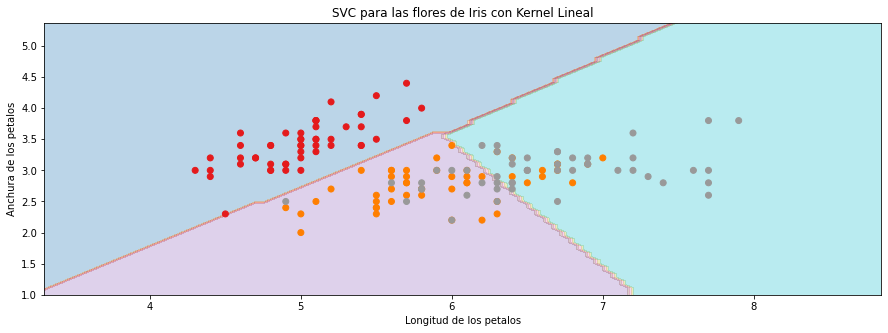

In [64]:
#haremos un dibujo que juntara todo en un grafico. 
plt.figure(figsize=(15,5))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Set1)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [65]:
#para comprobar si funciona mejor en lineal, o basado en el radio. 
C = 1.0
svc = svm.SVC(kernel = "rbf", C=C, decision_function_shape = "ovr").fit(X,Y)
#la prediccion sera 
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel radial')

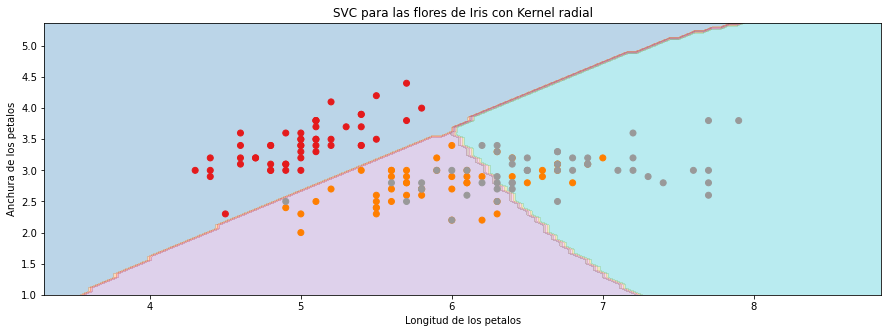

In [66]:
plt.figure(figsize=(15,5))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.Set1)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel radial")